Plan is to isloate the most likely variables to predict a swing and a miss

In [111]:
from pybaseball import statcast
import pandas as pd
import numpy as np

In [112]:
statcast(start_dt="2019-06-24", end_dt="2019-06-25").columns

This is a large query, it may take a moment to complete


  0%|          | 0/2 [00:00<?, ?it/s]C:\Users\elieberm1\AppData\Roaming\Python\Python313\site-packages\pybaseball\datahelpers\postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
 50%|█████     | 1/2 [00:00<00:00,  2.34it/s]C:\Users\elieberm1\AppData\Roaming\Python\Python313\site-packages\pybaseball\datahelpers\postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
100%|██████████| 2/2 [00:00<00:00,  2.35it/s]


Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description',
       ...
       'batter_days_until_next_game', 'api_break_z_with_gravity',
       'api_break_x_arm', 'api_break_x_batter_in', 'arm_angle', 'attack_angle',
       'attack_direction', 'swing_path_tilt',
       'intercept_ball_minus_batter_pos_x_inches',
       'intercept_ball_minus_batter_pos_y_inches'],
      dtype='object', length=118)

In [113]:
statcast(start_dt="2019-06-24", end_dt="2019-06-25").head()

This is a large query, it may take a moment to complete


  0%|          | 0/2 [00:00<?, ?it/s]C:\Users\elieberm1\AppData\Roaming\Python\Python313\site-packages\pybaseball\datahelpers\postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
 50%|█████     | 1/2 [00:00<00:00,  2.86it/s]C:\Users\elieberm1\AppData\Roaming\Python\Python313\site-packages\pybaseball\datahelpers\postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
100%|██████████| 2/2 [00:00<00:00,  2.71it/s]


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches
3014,FF,2019-06-25,93.1,-2.33,5.21,"Festa, Matt",460075,670036,field_out,hit_into_play,...,1,1.41,0.69,0.69,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3046,SL,2019-06-25,87.0,-2.27,5.16,"Festa, Matt",592885,670036,strikeout,swinging_strike_blocked,...,1,2.39,-0.36,0.36,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3177,FF,2019-06-25,93.3,-2.59,4.93,"Festa, Matt",592885,670036,NaN,ball,...,1,1.44,0.5,-0.5,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3294,FF,2019-06-25,93.3,-2.4,5.07,"Festa, Matt",592885,670036,NaN,foul,...,1,1.4,0.32,-0.32,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3410,FF,2019-06-25,92.8,-2.62,5.05,"Festa, Matt",592885,670036,NaN,called_strike,...,1,1.48,0.38,-0.38,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


## EDA

In [114]:
statcast_df = statcast(start_dt="2019-06-24", end_dt="2019-07-25")
distinct_descriptions = statcast_df["description"].unique()
print(distinct_descriptions)
description_counts = statcast_df["description"].value_counts()
print(description_counts)


This is a large query, it may take a moment to complete


  0%|          | 0/32 [00:00<?, ?it/s]C:\Users\elieberm1\AppData\Roaming\Python\Python313\site-packages\pybaseball\datahelpers\postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
  3%|▎         | 1/32 [00:00<00:15,  1.95it/s]C:\Users\elieberm1\AppData\Roaming\Python\Python313\site-packages\pybaseball\datahelpers\postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
  6%|▋         | 2/32 [00:00<00:10,  2.97it/s]C:\Users\elieberm1\AppData\Roaming\Python\Python313\site-packages\pybaseball\datahelpers\postprocessing.py:59: FutureWarning: 

['swinging_strike' 'ball' 'foul' 'called_strike' 'hit_into_play'
 'foul_tip' 'blocked_ball' 'swinging_strike_blocked' 'hit_by_pitch'
 'foul_bunt' 'automatic_ball' 'pitchout' 'missed_bunt' 'bunt_foul_tip']
description
ball                       37808
foul                       20751
hit_into_play              19729
called_strike              18323
swinging_strike            12033
blocked_ball                2641
foul_tip                    1049
swinging_strike_blocked      927
automatic_ball               399
hit_by_pitch                 299
foul_bunt                    251
missed_bunt                   46
pitchout                      13
bunt_foul_tip                  7
Name: count, dtype: int64


In [115]:
print(statcast_df.shape)


(114276, 118)


In [116]:
## Drop unhelpful columns

In [117]:
coverage = (1 - statcast_df.isna().mean()).sort_values(ascending=False)
low_coverage = coverage[coverage < 0.70]
low_coverage.head(42)
low_coverage_cols = low_coverage.index.tolist()
low_coverage_cols

['on_1b',
 'hyper_speed',
 'launch_angle',
 'launch_speed',
 'hit_distance_sc',
 'iso_value',
 'babip_value',
 'woba_value',
 'events',
 'woba_denom',
 'estimated_woba_using_speedangle',
 'hit_location',
 'on_2b',
 'bb_type',
 'hc_x',
 'hc_y',
 'launch_speed_angle',
 'estimated_ba_using_speedangle',
 'estimated_slg_using_speedangle',
 'on_3b',
 'umpire',
 'tfs_zulu_deprecated',
 'tfs_deprecated',
 'sv_id',
 'break_length_deprecated',
 'break_angle_deprecated',
 'spin_rate_deprecated',
 'spin_dir',
 'swing_length',
 'bat_speed',
 'arm_angle',
 'attack_angle',
 'attack_direction',
 'swing_path_tilt',
 'intercept_ball_minus_batter_pos_x_inches',
 'intercept_ball_minus_batter_pos_y_inches']

In [118]:
# Add useful columns to prevent removal
useful_cols = ['on_2b', 'on_3b', 'on_1b']

drop_cols = sorted(set(low_coverage_cols) - set(useful_cols))
(drop_cols)


['arm_angle',
 'attack_angle',
 'attack_direction',
 'babip_value',
 'bat_speed',
 'bb_type',
 'break_angle_deprecated',
 'break_length_deprecated',
 'estimated_ba_using_speedangle',
 'estimated_slg_using_speedangle',
 'estimated_woba_using_speedangle',
 'events',
 'hc_x',
 'hc_y',
 'hit_distance_sc',
 'hit_location',
 'hyper_speed',
 'intercept_ball_minus_batter_pos_x_inches',
 'intercept_ball_minus_batter_pos_y_inches',
 'iso_value',
 'launch_angle',
 'launch_speed',
 'launch_speed_angle',
 'spin_dir',
 'spin_rate_deprecated',
 'sv_id',
 'swing_length',
 'swing_path_tilt',
 'tfs_deprecated',
 'tfs_zulu_deprecated',
 'umpire',
 'woba_denom',
 'woba_value']

In [119]:
sc_df_reduced = statcast_df.drop(columns=drop_cols)
sc_df_reduced.shape


(114276, 85)

In [120]:
sc_df_reduced.dtypes.value_counts()

Int64             44
Float64           26
object            14
datetime64[ns]     1
Name: count, dtype: int64

In [121]:
int_cols = sc_df_reduced.select_dtypes(include=['int64', 'float64']).columns
int_cols

Index(['release_speed', 'release_pos_x', 'release_pos_z', 'batter', 'pitcher',
       'zone', 'balls', 'strikes', 'game_year', 'pfx_x', 'pfx_z', 'plate_x',
       'plate_z', 'on_3b', 'on_2b', 'on_1b', 'outs_when_up', 'inning', 'vx0',
       'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'fielder_2',
       'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6', 'fielder_7',
       'fielder_8', 'fielder_9', 'release_pos_y', 'at_bat_number',
       'pitch_number', 'home_score', 'away_score', 'bat_score', 'fld_score',
       'post_away_score', 'post_home_score', 'post_bat_score',
       'post_fld_score', 'spin_axis', 'delta_home_win_exp', 'delta_run_exp',
       'delta_pitcher_run_exp', 'home_score_diff', 'bat_score_diff',
       'home_win_exp', 'bat_win_exp', 'age_pit_legacy', 'age_bat_legacy',
       'age_pit', 'age_bat', 'n_thruorder_pitcher',
       'n_priorpa_thisgame_player_at_bat', 'pitcher_days_since_p

In [122]:
cat_cols = sc_df_reduced.select_dtypes(include=['object', 'category', 'bool']).columns
cat_cols

Index(['pitch_type', 'player_name', 'description', 'des', 'game_type', 'stand',
       'p_throws', 'home_team', 'away_team', 'type', 'inning_topbot',
       'pitch_name', 'if_fielding_alignment', 'of_fielding_alignment'],
      dtype='object')

In [123]:
import pandas as pd

drop_cols_2 = [
    'player_name', 'des', 'type', 'delta_run_exp', 'delta_pitcher_run_exp',
    'post_home_score', 'post_away_score', 'post_bat_score', 'post_fld_score',
    'home_team', 'away_team', 'delta_home_win_exp'
]
deprecated_cols = [
    c for c in sc_df_reduced.columns
    if "deprecated" in str(c).lower()
]

cols_to_drop = list(set(drop_cols_2).union(deprecated_cols))

sc_df_reduced = sc_df_reduced.drop(columns=cols_to_drop, errors="ignore")

print("Dropped (explicit):", [c for c in drop_cols_2 if c in cols_to_drop])
print("Dropped (deprecated):", deprecated_cols)
print("New shape:", sc_df_reduced.shape)


Dropped (explicit): ['player_name', 'des', 'type', 'delta_run_exp', 'delta_pitcher_run_exp', 'post_home_score', 'post_away_score', 'post_bat_score', 'post_fld_score', 'home_team', 'away_team', 'delta_home_win_exp']
Dropped (deprecated): []
New shape: (114276, 73)


In [124]:
int_cols_2 = sc_df_reduced.select_dtypes(include=['int64', 'float64']).columns
int_cols_2

Index(['release_speed', 'release_pos_x', 'release_pos_z', 'batter', 'pitcher',
       'zone', 'balls', 'strikes', 'game_year', 'pfx_x', 'pfx_z', 'plate_x',
       'plate_z', 'on_3b', 'on_2b', 'on_1b', 'outs_when_up', 'inning', 'vx0',
       'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'fielder_2',
       'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6', 'fielder_7',
       'fielder_8', 'fielder_9', 'release_pos_y', 'at_bat_number',
       'pitch_number', 'home_score', 'away_score', 'bat_score', 'fld_score',
       'spin_axis', 'home_score_diff', 'bat_score_diff', 'home_win_exp',
       'bat_win_exp', 'age_pit_legacy', 'age_bat_legacy', 'age_pit', 'age_bat',
       'n_thruorder_pitcher', 'n_priorpa_thisgame_player_at_bat',
       'pitcher_days_since_prev_game', 'batter_days_since_prev_game',
       'pitcher_days_until_next_game', 'batter_days_until_next_game',
       'api_break_z_with_gravity', 'api_

In [125]:
cat_cols_2 = sc_df_reduced.select_dtypes(include=['object', 'category', 'bool']).columns
cat_cols_2

Index(['pitch_type', 'description', 'game_type', 'stand', 'p_throws',
       'inning_topbot', 'pitch_name', 'if_fielding_alignment',
       'of_fielding_alignment'],
      dtype='object')

In [126]:
sc_df_reduced.describe(include="all").T


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
pitch_type,113816,16,FF,41634,NaN,NaN,NaN,NaN,NaN,NaN,NaN
game_date,114276,NaN,NaN,NaN,2019-07-09 22:20:17.263467264,2019-06-24 00:00:00,2019-07-01 00:00:00,2019-07-12 00:00:00,2019-07-19 00:00:00,2019-07-25 00:00:00,NaN
release_speed,113833.0,<NA>,<NA>,<NA>,88.80022,50.8,84.6,90.1,93.5,102.4,5.969481
release_pos_x,113828.0,<NA>,<NA>,<NA>,-0.724525,-5.38,-2.14,-1.5,1.31,4.73,1.967548
release_pos_z,113828.0,<NA>,<NA>,<NA>,5.893724,0.59,5.62,5.92,6.22,7.35,0.495926
...,...,...,...,...,...,...,...,...,...,...,...
pitcher_days_until_next_game,112969.0,<NA>,<NA>,<NA>,6.410458,0.0,3.0,5.0,6.0,73.0,6.97348
batter_days_until_next_game,114010.0,<NA>,<NA>,<NA>,1.931085,0.0,1.0,1.0,2.0,87.0,3.989042
api_break_z_with_gravity,113828.0,<NA>,<NA>,<NA>,2.319525,0.37,1.41,2.08,2.97,10.15,1.107916
api_break_x_arm,113828.0,<NA>,<NA>,<NA>,0.382155,-2.28,-0.23,0.52,1.02,2.34,0.771703


This is a large query, it may take a moment to complete


  0%|          | 0/2 [00:00<?, ?it/s]C:\Users\elieberm1\AppData\Roaming\Python\Python313\site-packages\pybaseball\datahelpers\postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
 50%|█████     | 1/2 [00:00<00:00,  2.81it/s]C:\Users\elieberm1\AppData\Roaming\Python\Python313\site-packages\pybaseball\datahelpers\postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data_copy[column] = data_copy[column].apply(pd.to_datetime, errors='ignore', format=date_format)
100%|██████████| 2/2 [00:00<00:00,  2.10it/s]


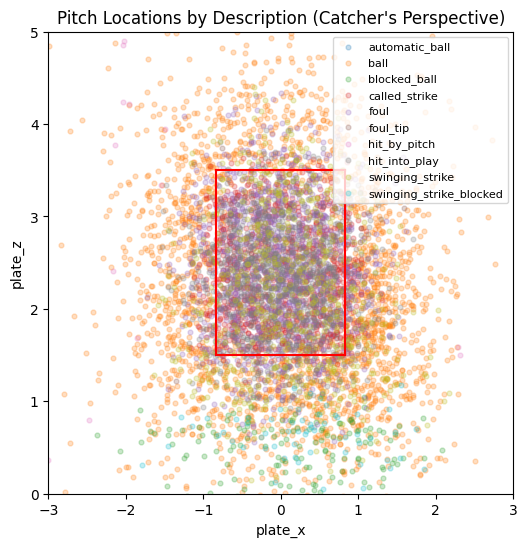

In [127]:
import matplotlib.pyplot as plt

sc_df_reduced = statcast(start_dt="2019-06-24", end_dt="2019-06-25")

# Top 10 descriptions for readable legend
top_desc = sc_df_reduced["description"].value_counts().head(10).index
plot_df = sc_df_reduced[sc_df_reduced["description"].isin(top_desc)]

plt.figure(figsize=(6, 6))
for desc, group in plot_df.groupby("description"):
    plt.scatter(group["plate_x"], group["plate_z"], alpha=0.25, s=12, label=desc)

# Strike zone overlay
plt.plot([-0.83, 0.83], [1.5, 1.5], color="red")
plt.plot([-0.83, 0.83], [3.5, 3.5], color="red")
plt.plot([-0.83, -0.83], [1.5, 3.5], color="red")
plt.plot([0.83, 0.83], [1.5, 3.5], color="red")

plt.xlim(-3, 3)
plt.ylim(0, 5)
plt.xlabel("plate_x")
plt.ylabel("plate_z")
plt.title("Pitch Locations by Description (Catcher's Perspective)")
plt.legend(loc="upper right", fontsize=8)
plt.show()


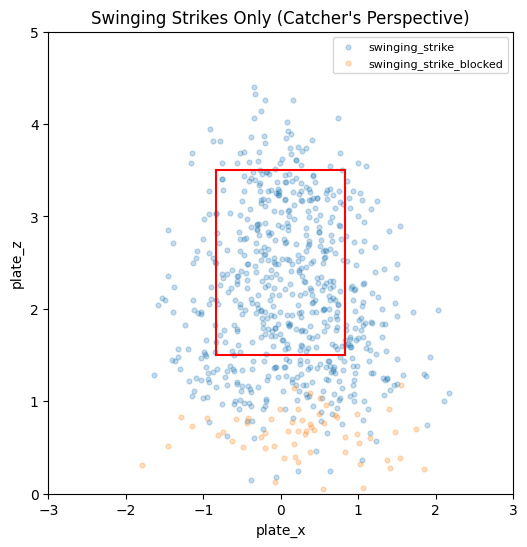

In [128]:
import matplotlib.pyplot as plt

mask = sc_df_reduced["description"].isin(["swinging_strike", "swinging_strike_blocked"])
plot_df = sc_df_reduced[mask]

plt.figure(figsize=(6, 6))
for desc, group in plot_df.groupby("description"):
    plt.scatter(group["plate_x"], group["plate_z"], alpha=0.25, s=12, label=desc)

# Strike zone
plt.plot([-0.83, 0.83], [1.5, 1.5], color="red")
plt.plot([-0.83, 0.83], [3.5, 3.5], color="red")
plt.plot([-0.83, -0.83], [1.5, 3.5], color="red")
plt.plot([0.83, 0.83], [1.5, 3.5], color="red")

plt.xlim(-3, 3)
plt.ylim(0, 5)
plt.xlabel("plate_x")
plt.ylabel("plate_z")
plt.title("Swinging Strikes Only (Catcher's Perspective)")
plt.legend(loc="upper right", fontsize=8)
plt.show()


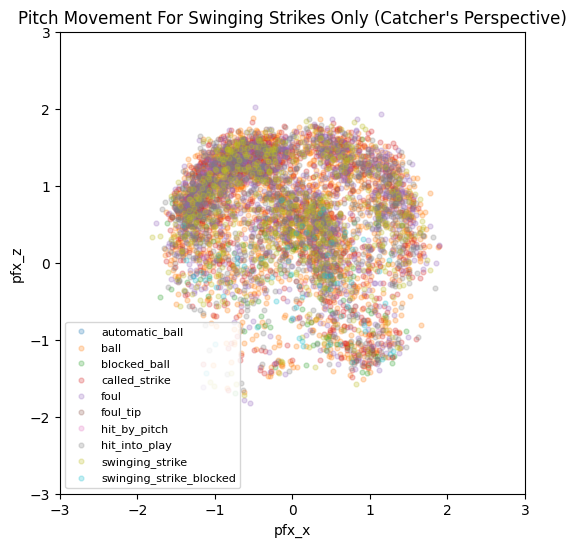

In [129]:
import matplotlib.pyplot as plt

# Top 10 descriptions for readable legend
top_desc = sc_df_reduced["description"].value_counts().head(10).index
plot_df = sc_df_reduced[sc_df_reduced["description"].isin(top_desc)]

plt.figure(figsize=(6, 6))
for desc, group in plot_df.groupby("description"):
    plt.scatter(group["pfx_x"], group["pfx_z"], alpha=0.25, s=12, label=desc)



plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.xlabel("pfx_x")
plt.ylabel("pfx_z")
plt.title("Pitch Movement For Swinging Strikes Only (Catcher's Perspective)")
plt.legend(loc="best", fontsize=8)
plt.show()


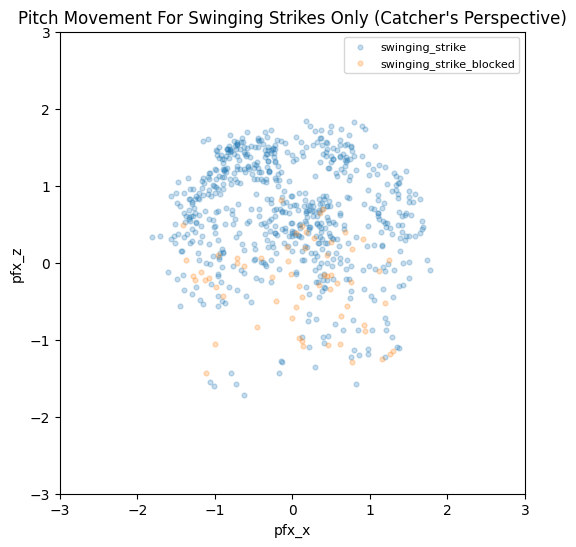

In [130]:
import matplotlib.pyplot as plt

mask = sc_df_reduced["description"].isin(["swinging_strike", "swinging_strike_blocked"])
plot_df = sc_df_reduced[mask]

plt.figure(figsize=(6, 6))
for desc, group in plot_df.groupby("description"):
    plt.scatter(group["pfx_x"], group["pfx_z"], alpha=0.25, s=12, label=desc)



plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.xlabel("pfx_x")
plt.ylabel("pfx_z")
plt.title("Pitch Movement For Swinging Strikes Only (Catcher's Perspective)")
plt.legend(loc="upper right", fontsize=8)
plt.show()


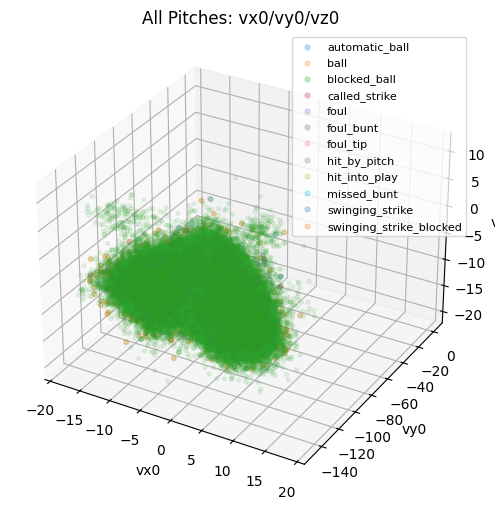

In [131]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (needed for 3d)

fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection="3d")

for desc, group in sc_df_reduced.groupby("description"):
    ax.scatter(group["vx0"], group["vy0"], group["vz0"], alpha=0.25, s=12, label=desc)


ax.scatter(statcast_df["vx0"], statcast_df["vy0"], statcast_df["vz0"], alpha=0.1, s=8)
ax.set_xlabel("vx0")
ax.set_ylabel("vy0")
ax.set_zlabel("vz0")
ax.set_title("All Pitches: vx0/vy0/vz0")
ax.legend(loc="best", fontsize=8)
plt.show()



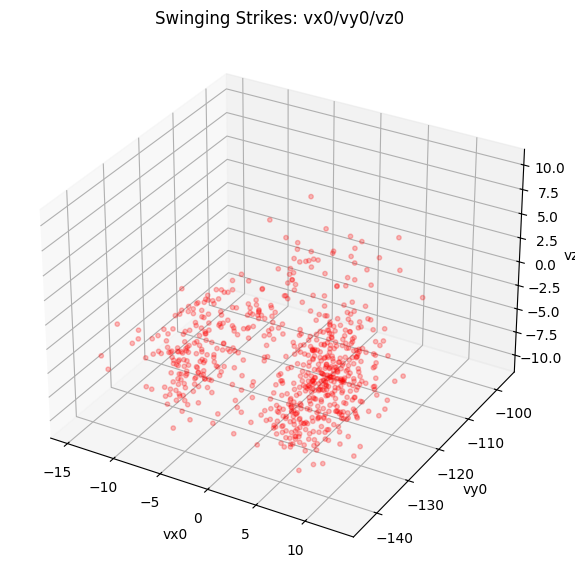

In [132]:

# --- With mask (swinging strikes only) ---
mask = sc_df_reduced["description"].isin(["swinging_strike", "swinging_strike_blocked"])
masked_df = sc_df_reduced[mask]

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(masked_df["vx0"], masked_df["vy0"], masked_df["vz0"], alpha=0.25, s=10, c="red")
ax.set_xlabel("vx0")
ax.set_ylabel("vy0")
ax.set_zlabel("vz0")
ax.set_title("Swinging Strikes: vx0/vy0/vz0")
plt.show()

Check to see if data has been pre-normalized to account for handed ness

In [133]:
sc_df_reduced["p_throws"].value_counts()

p_throws
R    4274
L    2207
Name: count, dtype: int64

In [134]:
import numpy as np
import pandas as pd

# df = your statcast pitch-by-pitch dataframe
# Must include: p_throws (L/R), plus whichever x-fields you want to sanity-check

X_FIELDS = [
    "plate_x",        # horizontal plate location (catcher view)
    "pfx_x",          # horizontal movement (catcher view)
    "release_pos_x",  # horizontal release position (catcher view)
]

def sanity_check_handedness_mirroring(sc_df_reduced: pd.DataFrame, x_fields=X_FIELDS) -> pd.DataFrame:
    """
    Sanity check: in Savant/Statcast data (catcher's perspective), x-fields should look mirrored by p_throws.
    We compute:
      - mean/median/std by handedness
      - correlation between value and handedness-coded sign
      - percent of values > 0 by handedness
    """
    out_rows = []

    # Clean to L/R only
    d = sc_df_reduced.copy()
    d = d[d["p_throws"].isin(["L", "R"])]

    # Encode handedness: R=+1, L=-1 (useful for sign tests)
    throw_sign = d["p_throws"].map({"R": 1, "L": -1}).astype("int8")

    for col in x_fields:
        if col not in d.columns:
            continue

        s = pd.to_numeric(d[col], errors="coerce")
        mask = s.notna()
        s = s[mask]
        ts = throw_sign[mask]

        # Summary stats by handedness
        grp = pd.DataFrame({"p_throws": d.loc[mask, "p_throws"], col: s}).groupby("p_throws")[col]
        stats = grp.agg(["count", "mean", "median", "std"]).reset_index()

        # Extra diagnostics:
        # 1) percent positive by handedness
        pct_pos = grp.apply(lambda x: (x > 0).mean()).rename("pct_gt_0").reset_index()

        # 2) "mirror score": mean(value * throw_sign)
        #    If L is roughly the mirror of R, value*throw_sign tends to align (e.g. arm-side positive).
        mirror_score = float(np.nanmean(s.to_numpy() * ts.to_numpy()))

        # 3) simple correlation between value and throw_sign
        corr = float(np.corrcoef(s.to_numpy(), ts.to_numpy())[0, 1]) if len(s) > 1 else np.nan

        # Combine into one tidy table per column
        merged = stats.merge(pct_pos, on="p_throws", how="left")
        for _, r in merged.iterrows():
            out_rows.append({
                "field": col,
                "p_throws": r["p_throws"],
                "count": int(r["count"]),
                "mean": float(r["mean"]),
                "median": float(r["median"]),
                "std": float(r["std"]) if not pd.isna(r["std"]) else np.nan,
                "pct_gt_0": float(r["pct_gt_0"]),
                "mirror_score_mean(value*throw_sign)": mirror_score,
                "corr(value, throw_sign)": corr,
            })

    return pd.DataFrame(out_rows).sort_values(["field", "p_throws"])


# ---- Example usage ----
# from pybaseball import statcast
# df = statcast(start_dt="2024-04-01", end_dt="2024-04-30")

report = sanity_check_handedness_mirroring(sc_df_reduced, X_FIELDS)
print(report.to_string(index=False))


# ---- Optional: quick visual sanity check (one field at a time) ----
import matplotlib.pyplot as plt

def plot_handedness_hist(df: pd.DataFrame, field: str, bins=60):
    d = df[df["p_throws"].isin(["L", "R"])].copy()
    d[field] = pd.to_numeric(d[field], errors="coerce")
    d = d.dropna(subset=[field])

    plt.figure()
    plt.hist(d.loc[d["p_throws"] == "R", field], bins=bins, alpha=0.6, label="RHP")
    plt.hist(d.loc[d["p_throws"] == "L", field], bins=bins, alpha=0.6, label="LHP")
    plt.title(f"{field} distribution by p_throws (expect mirrored shift if unnormalized)")
    plt.xlabel(field)
    plt.ylabel("count")
    plt.legend()
    plt.show()

# plot_handedness_hist(df, "plate_x")


        field p_throws  count      mean  median      std  pct_gt_0  mirror_score_mean(value*throw_sign)  corr(value, throw_sign)
        pfx_x        L   2181  0.414842    0.49 0.782676  0.659331                            -0.371886                -0.426291
        pfx_x        R   4255 -0.349868   -0.47 0.760664  0.341481                            -0.371886                -0.426291
      plate_x        L   2181 -0.046034   -0.03 0.843367  0.482348                             0.080918                 0.081556
      plate_x        R   4255  0.098799    0.10 0.835077  0.544066                             0.080918                 0.081556
release_pos_x        L   2181  2.330183    2.30 0.755289  1.000000                            -2.094351                -0.944958
release_pos_x        R   4255 -1.973469   -1.93 0.678466  0.006345                            -2.094351                -0.944958


In [135]:
FLIP_COLS = ["release_pos_x", "vx0", "ax"]

def flip_x_for_lefties(df: pd.DataFrame,
                       flip_cols=FLIP_COLS,
                       handed_col: str = "p_throws",
                       left_value: str = "L") -> pd.DataFrame:
    out = df.copy()

    if handed_col not in out.columns:
        raise KeyError(f"Missing handedness column: {handed_col}")

    mask_L = out[handed_col].eq(left_value)

    # Flip only columns that exist
    cols_present = [c for c in flip_cols if c in out.columns]
    cols_missing = [c for c in flip_cols if c not in out.columns]

    for c in cols_present:
        out[c] = pd.to_numeric(out[c], errors="coerce")
        out.loc[mask_L, c] = -out.loc[mask_L, c]

    print("Flipped columns (LHP only):", cols_present)
    if cols_missing:
        print("WARNING: missing columns (not flipped):", cols_missing)

    return out



In [136]:

def handedness_report(df: pd.DataFrame, cols, handed_col="p_throws") -> pd.DataFrame:
    d = df[df[handed_col].isin(["L", "R"])].copy()
    rows = []
    for c in cols:
        if c not in d.columns:
            continue
        s = pd.to_numeric(d[c], errors="coerce")
        g = pd.DataFrame({handed_col: d[handed_col], c: s}).dropna().groupby(handed_col)[c]
        stats = g.agg(count="count", mean="mean", median="median", std="std")
        stats["pct_gt_0"] = g.apply(lambda x: (x > 0).mean())
        stats["field"] = c
        rows.append(stats.reset_index())
    return pd.concat(rows, ignore_index=True)[["field", handed_col, "count", "mean", "median", "std", "pct_gt_0"]]


print("\n=== BEFORE ===")
print(handedness_report(sc_df_reduced, FLIP_COLS).to_string(index=False))

sc_df_norm = flip_x_for_lefties(sc_df_reduced, FLIP_COLS)

print("\n=== AFTER ===")
print(handedness_report(sc_df_norm, FLIP_COLS).to_string(index=False))



=== BEFORE ===
        field p_throws  count      mean    median       std  pct_gt_0
release_pos_x        L   2181  2.330183       2.3  0.755289  1.000000
release_pos_x        R   4255 -1.973469     -1.93  0.678466  0.006345
          vx0        L   2181 -6.595363 -6.575019  3.031329  0.013755
          vx0        R   4255  5.856366  5.817351   2.84031  0.979318
           ax        L   2181  6.432827  6.986198  8.670694  0.711600
           ax        R   4255 -5.775292 -6.981007  8.612329  0.318919
Flipped columns (LHP only): ['release_pos_x', 'vx0', 'ax']

=== AFTER ===
        field p_throws  count      mean    median       std  pct_gt_0
release_pos_x        L   2181 -2.330183      -2.3  0.755289  0.000000
release_pos_x        R   4255 -1.973469     -1.93  0.678466  0.006345
          vx0        L   2181  6.595363  6.575019  3.031329  0.986245
          vx0        R   4255  5.856366  5.817351   2.84031  0.979318
           ax        L   2181 -6.432827 -6.986198  8.670694  0.288400


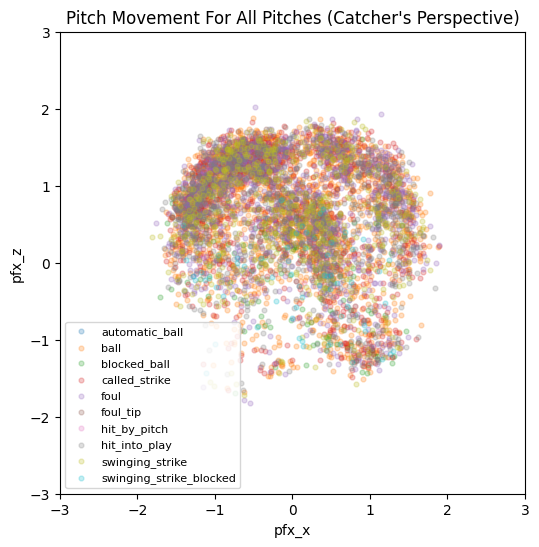

In [137]:
import matplotlib.pyplot as plt


top_desc = sc_df_norm["description"].value_counts().head(10).index
plot_df = sc_df_norm[sc_df_norm["description"].isin(top_desc)]

plt.figure(figsize=(6, 6))
for desc, group in plot_df.groupby("description"):
    plt.scatter(group["pfx_x"], group["pfx_z"], alpha=0.25, s=12, label=desc)



plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.xlabel("pfx_x")
plt.ylabel("pfx_z")
plt.title("Pitch Movement For All Pitches (Catcher's Perspective)")
plt.legend(loc="best", fontsize=8)
plt.show()


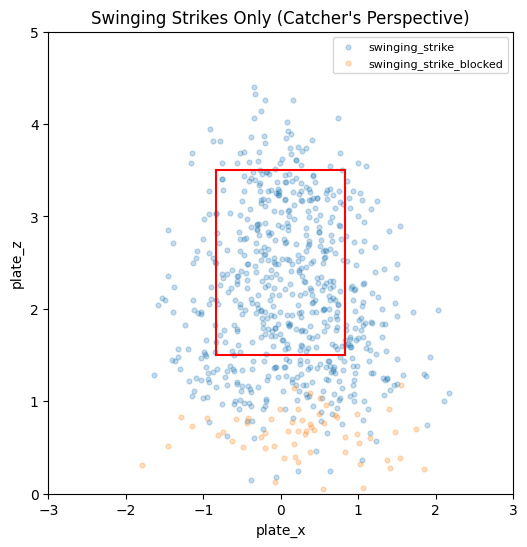

In [138]:
import matplotlib.pyplot as plt

mask = sc_df_norm["description"].isin(["swinging_strike", "swinging_strike_blocked"])
plot_df = sc_df_norm[mask]

plt.figure(figsize=(6, 6))
for desc, group in plot_df.groupby("description"):
    plt.scatter(group["plate_x"], group["plate_z"], alpha=0.25, s=12, label=desc)

# Strike zone
plt.plot([-0.83, 0.83], [1.5, 1.5], color="red")
plt.plot([-0.83, 0.83], [3.5, 3.5], color="red")
plt.plot([-0.83, -0.83], [1.5, 3.5], color="red")
plt.plot([0.83, 0.83], [1.5, 3.5], color="red")

plt.xlim(-3, 3)
plt.ylim(0, 5)
plt.xlabel("plate_x")
plt.ylabel("plate_z")
plt.title("Swinging Strikes Only (Catcher's Perspective)")
plt.legend(loc="upper right", fontsize=8)
plt.show()


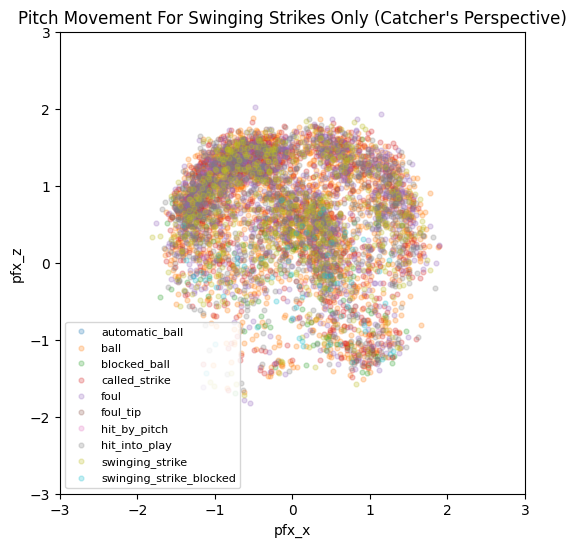

In [139]:
top_desc = sc_df_norm["description"].value_counts().head(10).index
plot_df = sc_df_norm[sc_df_norm["description"].isin(top_desc)]

plt.figure(figsize=(6, 6))
for desc, group in plot_df.groupby("description"):
    plt.scatter(group["pfx_x"], group["pfx_z"], alpha=0.25, s=12, label=desc)



plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.xlabel("pfx_x")
plt.ylabel("pfx_z")
plt.title("Pitch Movement For Swinging Strikes Only (Catcher's Perspective)")
plt.legend(loc="best", fontsize=8)
plt.show()


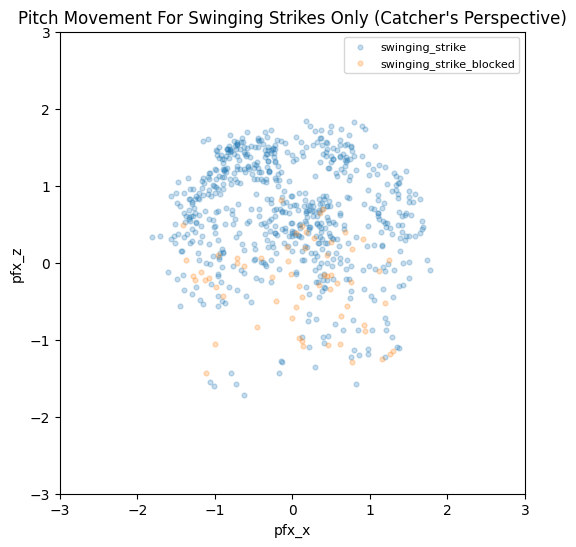

In [140]:
plot_df = sc_df_norm[mask]

plt.figure(figsize=(6, 6))
for desc, group in plot_df.groupby("description"):
    plt.scatter(group["pfx_x"], group["pfx_z"], alpha=0.25, s=12, label=desc)



plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.xlabel("pfx_x")
plt.ylabel("pfx_z")
plt.title("Pitch Movement For Swinging Strikes Only (Catcher's Perspective)")
plt.legend(loc="upper right", fontsize=8)
plt.show()


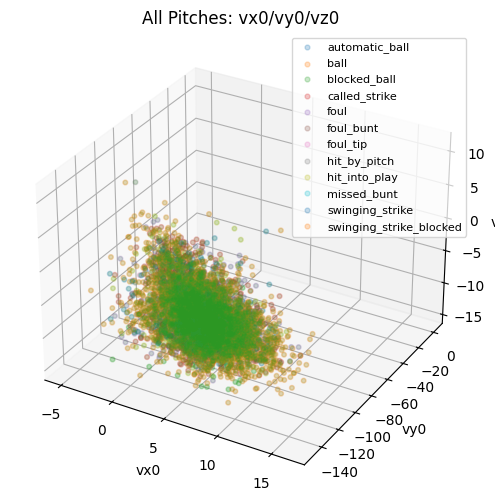

In [141]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (needed for 3d)

fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection="3d")

for desc, group in sc_df_norm.groupby("description"):
    ax.scatter(group["vx0"], group["vy0"], group["vz0"], alpha=0.25, s=12, label=desc)


ax.scatter(sc_df_norm["vx0"], sc_df_norm["vy0"], sc_df_norm["vz0"], alpha=0.1, s=8)
ax.set_xlabel("vx0")
ax.set_ylabel("vy0")
ax.set_zlabel("vz0")
ax.set_title("All Pitches: vx0/vy0/vz0")
ax.legend(loc="best", fontsize=8)
plt.show()



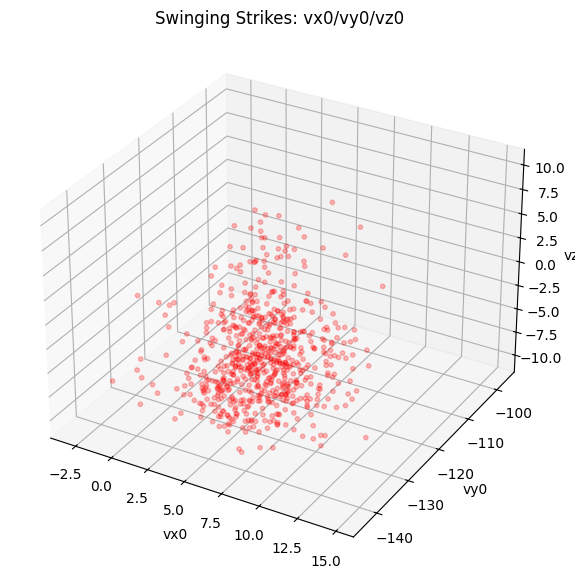

In [142]:

# --- With mask (swinging strikes only) ---
mask = sc_df_norm["description"].isin(["swinging_strike", "swinging_strike_blocked"])
masked_df = sc_df_norm[mask]

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(masked_df["vx0"], masked_df["vy0"], masked_df["vz0"], alpha=0.25, s=10, c="red")
ax.set_xlabel("vx0")
ax.set_ylabel("vy0")
ax.set_zlabel("vz0")
ax.set_title("Swinging Strikes: vx0/vy0/vz0")
plt.show()

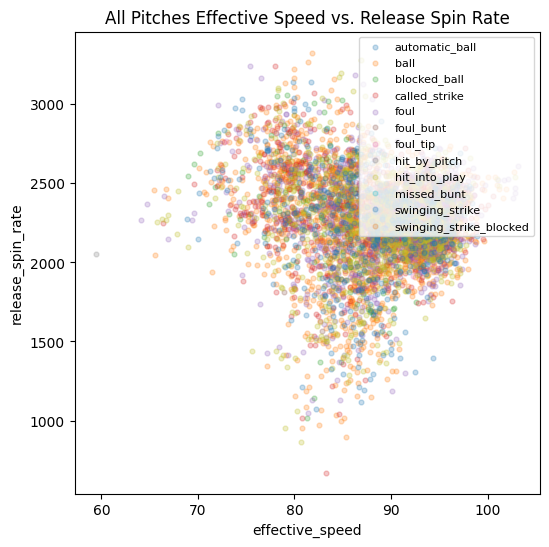

In [143]:
plt.figure(figsize=(6, 6))
for desc, group in sc_df_norm.groupby("description"):
    plt.scatter(group["effective_speed"], group["release_spin_rate"], alpha=0.25, s=12, label=desc)

plt.xlabel("effective_speed")
plt.ylabel("release_spin_rate")
plt.title("All Pitches Effective Speed vs. Release Spin Rate")
plt.legend(loc="upper right", fontsize=8)
plt.show()


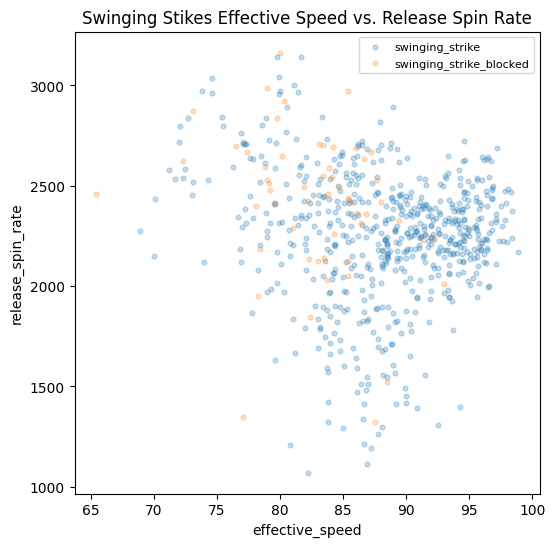

In [144]:
plt.figure(figsize=(6, 6))
for desc, group in plot_df.groupby("description"):
    plt.scatter(group["effective_speed"], group["release_spin_rate"], alpha=0.25, s=12, label=desc)

plt.xlabel("effective_speed")
plt.ylabel("release_spin_rate")
plt.title("Swinging Stikes Effective Speed vs. Release Spin Rate")
plt.legend(loc="upper right", fontsize=8)
plt.show()
